<a href="https://colab.research.google.com/github/ritwiks9635/Object_Recognition_And_Detection-/blob/main/Object_Detection_RetinaNet_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Object Detection Using RetinaNet**

In [1]:
# Clone the retinanet keras implementation

!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 9 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.


In [2]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=208091 sha256=04366835290f82d2a5c94446e90781b8b1e6fb14bfc50dd22263b687a693efe6
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20456 sha256=4adffaf6ac1cc49a9510fef6fc8ec55685ff98ada0c897ce9aa133ca9371347d
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-retinanet keras-resnet


In [3]:
# build the package

!python setup.py build_ext --inplace

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build_ext
copying build/lib.linux-x86_64-cpython-310/keras_retinanet/utils/compute_overlap.cpython-310-x86_64-linux-gnu.so -> keras_retinanet/utils


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
from PIL import Image

In [5]:
from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [6]:
# Download pretrained retinanet weights which are tained on coco dataset

urllib.request.urlretrieve('https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5', 'resnet50_coco_best_v2.1.0.h5')

('resnet50_coco_best_v2.1.0.h5', <http.client.HTTPMessage at 0x7efab9b1a8c0>)

In [7]:
!ls -la

total 149200
drwxr-xr-x 11 root root      4096 Apr 23 14:28 .
drwxr-xr-x  1 root root      4096 Apr 23 14:28 ..
drwxr-xr-x  5 root root      4096 Apr 23 14:28 build
-rw-r--r--  1 root root      1209 Apr 23 14:28 .codecov.yml
-rw-r--r--  1 root root      1393 Apr 23 14:28 CONTRIBUTORS.md
drwxr-xr-x  2 root root      4096 Apr 23 14:28 examples
drwxr-xr-x  8 root root      4096 Apr 23 14:28 .git
drwxr-xr-x  3 root root      4096 Apr 23 14:28 .github
-rw-r--r--  1 root root       273 Apr 23 14:28 .gitignore
-rw-r--r--  1 root root       116 Apr 23 14:28 .gitmodules
drwxr-xr-x  2 root root      4096 Apr 23 14:28 images
drwxr-xr-x 10 root root      4096 Apr 23 14:28 keras_retinanet
drwxr-xr-x  2 root root      4096 Apr 23 14:28 keras_retinanet.egg-info
-rw-r--r--  1 root root     11357 Apr 23 14:28 LICENSE
-rw-r--r--  1 root root     21234 Apr 23 14:28 README.md
-rw-r--r--  1 root root       205 Apr 23 14:28 requirements.txt
-rw-r--r--  1 root root 152662144 Apr 23 14:28 resnet50_coco_best_v

In [8]:
# Load the model

model = models.load_model('resnet50_coco_best_v2.1.0.h5')

In [9]:
# Download coco dataset labels

urllib.request.urlretrieve('https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-paper.txt', 'coco-labels-paper.txt')

('coco-labels-paper.txt', <http.client.HTTPMessage at 0x7efa5c397940>)

In [10]:
!ls coco-labels-paper.txt

coco-labels-paper.txt


In [15]:
classes = [label.rstrip() for label in open("coco-labels-paper.txt")]

print(classes)
print(len(classes))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']
91


In [27]:
def Predict_bounding_boxes(img_path, threshold=0.6):
    # Read image
    img = np.array(Image.open(img_path))
    print(f"Shape of the image: {img.shape}")

    # Remove the alpha channel from image
    img = img[:,:,:3]

    # Preprocess and resize - mean subtraction and scaling
    img_proc = preprocess_image(img)
    img_proc, scale = resize_image(img_proc)

    print(f"Shape of the pre processed image: {img_proc.shape}")

    boxes, scores, labels = model.predict_on_batch(np.expand_dims(img_proc, axis=0))

    # Stadardize teh boxes
    boxes /= scale

    for box, score, label in zip(boxes[0], scores[0], labels[0]):

        if score < threshold:
            break

        box = box.astype(np.int32) # Box has to be interger
        color = label_color(label)
        draw_box(img, box, color=color)


        class_label = classes[label]
        caption = f"{class_label} {score:.3f}"
        draw_caption(img, box, caption)

    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [17]:
!wget https://i1.wp.com/www.chakracommunity.com/wp-content/uploads/2016/01/bigstock-Busy-Street-in-Manhattan-93909977.jpg

--2024-04-23 15:24:37--  https://i1.wp.com/www.chakracommunity.com/wp-content/uploads/2016/01/bigstock-Busy-Street-in-Manhattan-93909977.jpg
Resolving i1.wp.com (i1.wp.com)... 192.0.77.2
Connecting to i1.wp.com (i1.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1949697 (1.9M) [image/jpeg]
Saving to: ‘bigstock-Busy-Street-in-Manhattan-93909977.jpg’

bigstock-Busy-Stree 100%[===================>]   1.86M  11.4MB/s    in 0.2s    

2024-04-23 15:24:37 (11.4 MB/s) - ‘bigstock-Busy-Street-in-Manhattan-93909977.jpg’ saved [1949697/1949697]



Shape of Image is :: (1067, 1600, 3)
0.7497656982193065
Shape of Preprocess Image :: (800, 1200, 3)


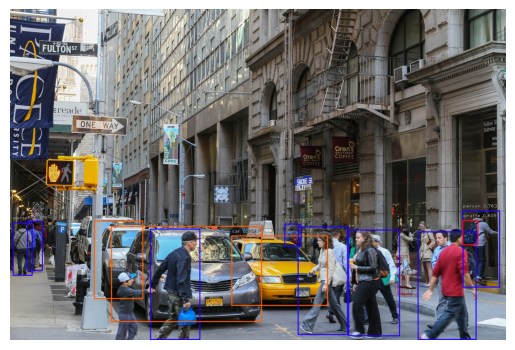

In [26]:
Predict_bounding_boxes("bigstock-Busy-Street-in-Manhattan-93909977.jpg")